# 숫자 순차열 데이터 예측 Template

# 데이터 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

숫자열이 1개라도 2차원 배열에 답는다. 

In [ ]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

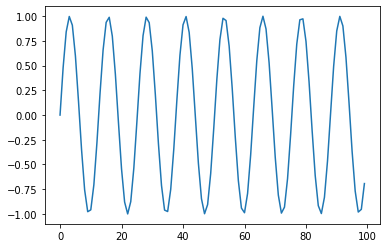

In [ ]:
plt.plot(numbers[:100,0])
plt.show()

In [ ]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> 6
23456 -> 7
34567 -> 8
...
56789 -> 0
```

In [ ]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [ ]:
print(raw_x[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]


In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]

train_y[0]
 [0.59847214]


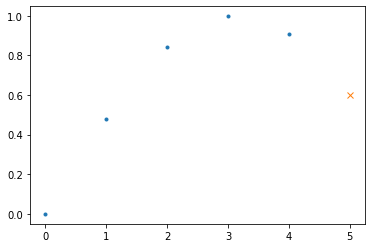

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')
plt.show()

# Template

## LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


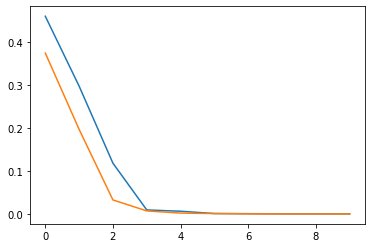

7/7 [==============================] - 0s 2ms/step - loss: 3.0200e-04 - mae: 0.0153
loss= 0.00030199624598026276
mae= 0.015253278426826


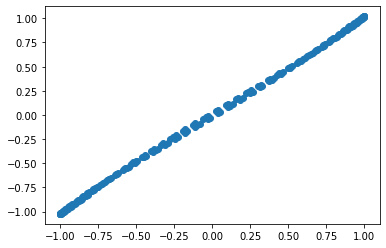

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## GRU

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


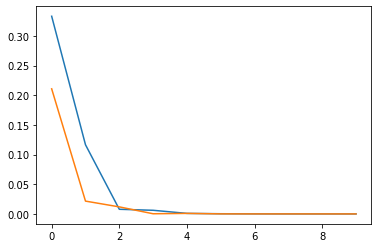

7/7 [==============================] - 0s 2ms/step - loss: 7.6341e-06 - mae: 0.0024
loss= 7.634068424522411e-06
mae= 0.0024450470227748156


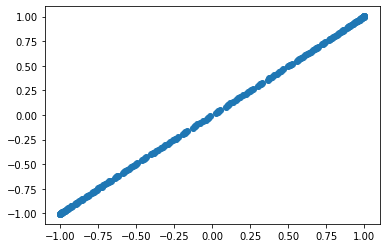

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + LSTM

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               133120    
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________


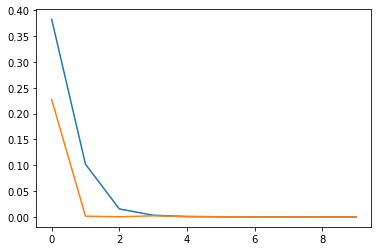

7/7 [==============================] - 0s 3ms/step - loss: 6.6350e-05 - mae: 0.0073
loss= 6.634974124608561e-05
mae= 0.007288681343197823


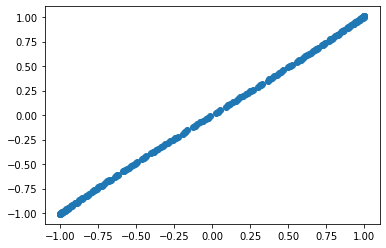

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               100608    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 100,865
Trainable params: 100,865
Non-trainable params: 0
_________________________________________________________________


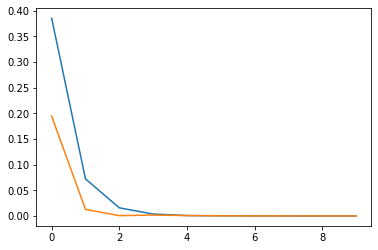

7/7 [==============================] - 0s 3ms/step - loss: 2.5248e-06 - mae: 0.0014
loss= 2.524832780181896e-06
mae= 0.0013536452315747738


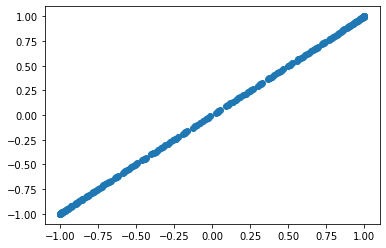

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## stacked

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 128)            66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


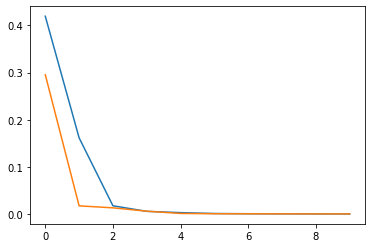

7/7 [==============================] - 0s 3ms/step - loss: 4.9593e-04 - mae: 0.0191
loss= 0.0004959258367307484
mae= 0.019067395478487015


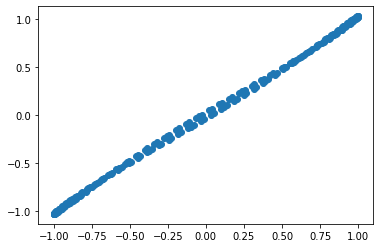

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

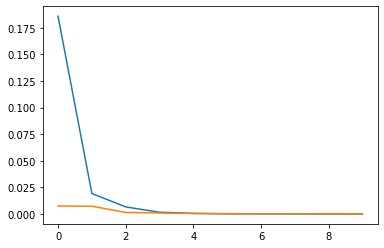

7/7 [==============================] - 0s 4ms/step - loss: 1.5948e-05 - mae: 0.0033
loss= 1.5948407963151112e-05
mae= 0.003293172223493457


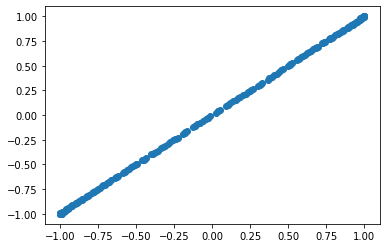

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN + LSTM

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 5, 32)             128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               82432     
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 85,793
Trainable params: 85,793
Non-trainable params: 0
_________________________________________________________________


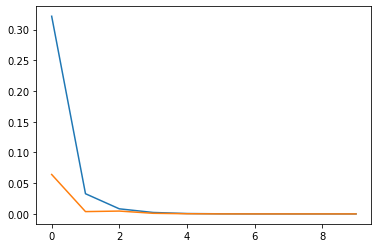

7/7 [==============================] - 0s 3ms/step - loss: 1.9739e-05 - mae: 0.0040
loss= 1.9739074559765868e-05
mae= 0.003953778184950352


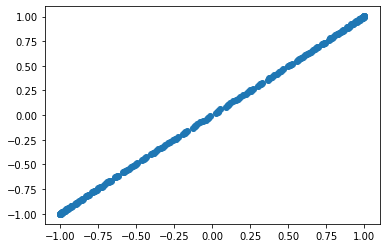

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()